## 1. The beginner's game


In [127]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
"""
Useful functions copied from student-game.py
"""
def probdist_beginner(X, sigma, mu_values):
    """ 
    Given an ndarray X_1..X_n, and a known sigma;
    and a list of the mu values in each column;
    return a list of the pub's inferred P(mu | X,sigma) for each column.
    """
    xbar = np.mean(X)
    N    = len(X)
    Pr   = [ stats.norm.pdf(x, loc=xbar, scale= sigma / math.sqrt(N)) for x in mu_values ]  # proportional to std error of the mean
    Z    = sum(Pr)                   # normalization constant
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

def probdist_advanced(X, mu_values):
    """ 
    Given an ndarray X_1..X_n,
    and a list of the mu values in each column;
    return a list of the pub's inferred P(mu | X) for each column.
    """
    xbar = np.mean(X)
    s    = np.std(X, ddof=1)     # note that numpy.std() by default calculates a population std dev; to get sample std. dev., set ddof=1
    N    = len(X)
    Pr   = [ stats.norm.pdf(x, loc=xbar, scale= s / math.sqrt(N)) for x in mu_values ]  # proportional to std error of the mean
    Z    = sum(Pr)                   # normalization constant
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

def tdist_advanced(X, mu_values):
    """ 
    Given an ndarray X_1..X_n,
    and a list of the mu values in each column;
    return a list of the inferred P(mu | X) for each column,
	according to a Student's t distribution with N-1 degrees of freedom.
    """
    N    = len(X)
    t    = [ stats.ttest_1samp(X, mu)[0] for mu in mu_values ]
    Pr   = [ stats.t.pdf(val, N-1) for val in t ]
    Z    = sum(Pr)
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr




In [159]:
from scipy.stats import norm
from scipy.special import logsumexp
import matplotlib as mpl

mpl.rcParams['figure.facecolor'] = 'white'




gridrows = np.linspace( 100.0,   5.0, 20)   # rows i of the grid are sigma, std. dev.
gridcols = np.linspace(-100.,  100.0, 21)   # columns j of the grid are mu, mean (location)

def beginner_game(X,true_sigma):
  
    posterior_numerator = np.zeros(21)
    for i,mu in enumerate(gridcols):
        posterior_numerator[i] = (np.sum(norm.logpdf(X,mu,true_sigma)) + np.log(1/21))
    posterior_denominator = logsumexp(posterior_numerator)

    posterior = np.zeros(21)
    for j,pos_num in enumerate(posterior_numerator):
        posterior[j] = posterior_numerator[j] - posterior_denominator

    return np.exp(posterior)

def semilogy_plot(posterior,pubs_posterior):
     plt.figure()
     plt.semilogy(gridcols, posterior, label="My Posterior")
     plt.semilogy(gridcols, pubs_posterior, label="Pubs Calculated")
     plt.xlabel('mu')
     plt.ylabel('semi_log(P(mu|X))')
     plt.legend()
     plt.title('semi_log(P(mu|X)) vs mu')
     plt.grid(True)
     plt.show()
    
    


### Get a random test sample of X and input variance for my beginner script from student-game.py with 5 samples and pluggin the true sigma and samples to our algorithm.

In [5]:
! python student-game.py 5

Welcome to Student's game night...

The RNG seed is 9761

The hidden grid has 20 rows for sigma 100.0..5.0,
                and 21 cols for mu -100.0..100.0.

Student picked grid col = 20, row = 2
and thus mu = 100.0, sigma = 90.0

Student's tea distribution machine shows the customers 5 samples:
     -6.89
    201.76
    123.41
    145.33
    128.72

which give sample mean:   118.47
   and sample std.dev.:    76.66
Figure(640x480)


My calculated posterior:
[1.07667958e-07 4.02117117e-07 1.41192083e-06 4.66079314e-06
 1.44644195e-05 4.22020832e-05 1.15759987e-04 2.98520902e-04
 7.23740243e-04 1.64961424e-03 3.53487263e-03 7.12126000e-03
 1.34875048e-02 2.40158567e-02 4.02027953e-02 6.32712067e-02
 9.36154831e-02 1.30220976e-01 1.70296573e-01 2.09373914e-01
 2.42008673e-01]


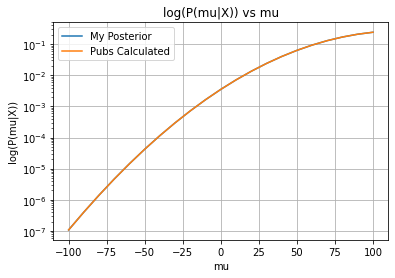

In [129]:
posterior = beginner_game( X = [-6.89,201.76,123.41,145.33,128.72], true_sigma = 90) # seed is 9761
print('My calculated posterior:')
print(posterior)
PrB = probdist_beginner(X = [-6.89,201.76,123.41,145.33,128.72], sigma = 90, mu_values = gridcols)

semilogy_plot(posterior,PrB)

### Showing the semilog plot for the X = [11.50, -2.32, 9.18], true_sigma = 60 for my calculated posterior distribution versus the pub's calculated distributions:

My calculated posterior:
[0.00105847 0.00245836 0.00525315 0.01032768 0.01868076 0.03108817
 0.04759974 0.06705371 0.08690602 0.10363004 0.1136921  0.1147582
 0.10657269 0.09105775 0.07158083 0.05177085 0.03444948 0.0210906
 0.01187965 0.00615641 0.00293535]


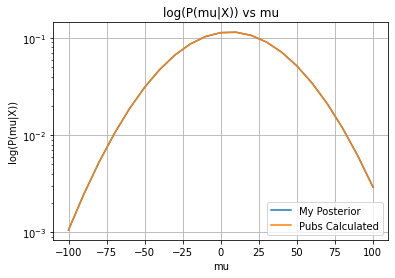

In [130]:
X = [ 11.50, -2.32, 9.18]

true_sigma = 60

posterior = beginner_game( X = X, true_sigma = true_sigma)
print('My calculated posterior:')
print(posterior)
PrB = probdist_beginner(X = X, sigma = true_sigma, mu_values = gridcols)

semilogy_plot(posterior,PrB)

### We can see from the above semi-log plot that the posterior distribution that I calculated is the same as the calculations from the pubs. The highest density is around mu = 5, which is close to the sample mean of 6. I calculated the posteriors by using a flat prior for mu and a normal likelihood where we plug in each true mu from the board given all the observed sample. This works out to be the same to the pubs calculation method where they plugged the sample mean and standard error as mean and standard deviation to the normal pdf and find the likelihood of getting each probable mu from the board. They then normalize their calculated likelihood and the resulting probability distribution is the same as my calculated posterior.

## 2. The advanced game

In [131]:
from cmath import log
from turtle import pos
from matplotlib.pyplot import title
import seaborn as sns
import pandas as pd


def advanced_game(X):
  
    posterior_numerator = pd.DataFrame(np.zeros((len(gridcols),len(gridrows))),
    index = gridcols,columns = gridrows)

    for mu in gridcols:
        for sigma in gridrows:
            posterior_numerator.loc[mu,sigma] = (np.sum(norm.logpdf(X,mu,sigma)) + np.log(1/21) + np.log(1/20))
    
    posterior_denominator = logsumexp(posterior_numerator)

    posterior = posterior_numerator.subtract(posterior_denominator)
    marginal_distribution = posterior.apply(logsumexp,axis=1)
    
    return np.exp(posterior), np.exp(marginal_distribution)

def heat_map(posterior):
    xlabels = [ "{0:.0f}".format(val) for val in gridcols ]
    ylabels = [ "{0:.0f}".format(val) for val in gridrows ]

    # the Seaborn "heatmap" plot
    # with some examples of how it can be customized.
    #
    ax = sns.heatmap(posterior.T,                 # takes a 2D array of data
                    xticklabels=xlabels,  #   ... set custom x axis labels
                    yticklabels=ylabels,  #   ... set custom y axis labels
                    cbar=True,           #   ... turn off the default color scale bar
                    square=True,          #   ... force the plot to be square
                    linecolor='grey',     #   ... set grid line color
                    linewidth=0.5)        #   ... set grid line width

    # now we have an Axes object that Seaborn returned to us,
    # and we can do additional customization, like...

    ax.set(xlabel='$\mu$',                 # ...set X axis label, using LaTeX formatting
        ylabel='$\sigma$',
        title = 'Joint Posterior Probability Heatmap')              # ...and Y axis label


### Get test sample of X for my advanced script from student-game.py with 4 samples and pluggin the sigma and samples to our algorithm.

In [188]:
! python student-game.py 4

Welcome to Student's game night...

The RNG seed is 4085

The hidden grid has 20 rows for sigma 100.0..5.0,
                and 21 cols for mu -100.0..100.0.

Student picked grid col = 6, row = 17
and thus mu = -40.0, sigma = 15.0

Student's tea distribution machine shows the customers 4 samples:
    -36.32
    -42.85
    -39.93
    -43.55

which give sample mean:   -40.66
   and sample std.dev.:     3.29
Figure(640x480)


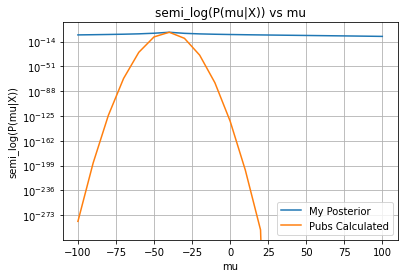

In [191]:
X = [-36.32,-42.85,-39.93,-43.55] # seed 4085
posterior, marginal_posterior = advanced_game(X = X)

PrA = probdist_advanced(X = X, mu_values = gridcols)

semilogy_plot(marginal_posterior,PrA)

### Showing the heatmap and semi-log plots for X = [11.50, -2.32, 9.18]. 

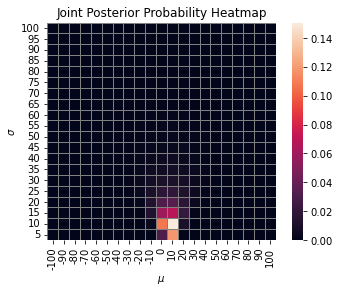

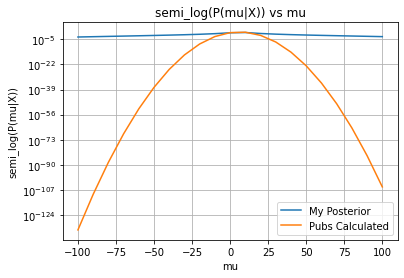

In [194]:
X = [ 11.50, -2.32, 9.18]
posterior, marginal_posterior = advanced_game(X = X)
heat_map(posterior)
PrA = probdist_advanced(X = X, mu_values = gridcols)
semilogy_plot(marginal_posterior,PrA)



### We see on the heatmap that the highest joint posterior probability is at $\mu$ = 10 and $\sigma$ = 10 which is close to the sample mean and sample standard deviation of 6. For the semilog plot, We observe that the my calculated distribution of $\mu$ is a lot wider than the pub's calculated posterior distribution of $\mu$.

## 3. Where's the advantage?

In [195]:
print('Mu with the highest marginal posterior probability according to my calculation:')
print(gridcols[np.argmax(marginal_posterior)])
print("Mu with the highest marginal posterior probability according to the Pub's calculation:")
print(gridcols[np.argmax(PrA)])

Mu with the highest marginal posterior probability according to my calculation:
10.0
Mu with the highest marginal posterior probability according to the Pub's calculation:
10.0


In [196]:
print('Payout calculated by my estimation for mu with the highest probability')
print((1 - np.max(marginal_posterior.to_numpy())) / np.max(marginal_posterior.to_numpy()))
print("Payout calculated by the pub's esimatesion for mu with the highest probability")
print((1 - np.max(PrA)) / np.max(PrA))

Payout calculated by my estimation for mu with the highest probability
1.3396869693373314
Payout calculated by the pub's esimatesion for mu with the highest probability
0.5504172691592528


### From the above calculations we see that there is no advantage for the player if they bet at the $\mu$ with the highest marginal posterior probability because I showed that the true pay out should be higher than pub's calculated payout at that guess. So the pub's odds is not fair if a player bets at the highest probability. The calculations below will show where we should bet at for the given sample where the pubs caluclated payout is greater than my calculated payouts

In [187]:

all_payouts_my_calc = (1 - marginal_posterior.to_numpy()) / marginal_posterior.to_numpy()

all_payouts_pubs_calc = (1 - np.array(PrA)) / np.array(PrA)

print('mu where the pubs payout will be greater than the fair payout')
print(gridcols[all_payouts_my_calc < all_payouts_pubs_calc])
print('mu with the highest difference in pubs payout vs. true payout')
print(gridcols[np.argmax(all_payouts_pubs_calc - all_payouts_my_calc)])

mu where the pubs payout will be greater than the fair payout
[-100.  -90.  -80.  -70.  -60.  -50.  -40.  -30.  -20.  -10.   20.   30.
   40.   50.   60.   70.   80.   90.  100.]
mu with the highest difference in pubs payout - true payout
-100.0


### We see that it is advantages to bet at any mu that is not 0 or 10. The mu that will give us the highest difference in pubs payout - true payout is -100
### There is a difference between my correct calculations vs the pub's calculations because in Student's calculations, he assumed that $\mu$ is distributated proportional to a normal distirbution with mean $\bar{x}$ and standard deviation $\dfrac{s}{\sqrt{n}}$. Student's estimation for $\sigma$ is wrong here because the sample size n is only 3. The 3 samples could come from the same region of the true distribution so calculating $\dfrac{s}{\sqrt{n}}$ would not be an robust estimation of $\sigma$ for a small sample size. To prove that my above explaination is right, I generated a 10000 samples (large number) from the board (code below) and we see on the semilog plot that the two distributions are now approximately the same.

In [179]:
nrows    = len(gridrows)
ncols    = len(gridcols)

# Student throws a uniformly distributed dart into the grid, and this
# chooses mu, sigma. These values are unknown to the customers.
np.random.seed(4)
true_row = np.random.randint(0, nrows)    # Note, randint(0,n) samples 0..n-1
true_col = np.random.randint(0, ncols)

true_sigma = gridrows[true_row]
true_mu    = gridcols[true_col]

# Student's tea distribution machine drops observed samples onto the
# line on the bar: nX of them, X[0..nX-1]
#
X  = np.random.normal(loc=true_mu, scale=true_sigma, size=10000)


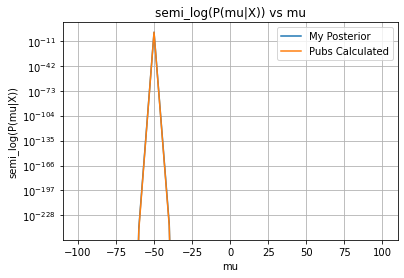

In [178]:
posterior, marginal_posterior = advanced_game(X = X)
PrA = probdist_advanced(X = X, mu_values = gridcols)
semilogy_plot(marginal_posterior,PrA)